In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns; sns.set()

from scipy.spatial import distance
from fastdtw import fastdtw

from BayKNN import *

In [4]:
from BayKNN import get_bayesian_k_posteriori, _check_array_ts, check_data_sktime_tsc

In [5]:
from utils import plot_dtw_dist

%matplotlib inline

# Data 
ECG200 https://timeseriesclassification.com/description.php?Dataset=ECG200


In [6]:
from sktime.utils.load_data import load_from_tsfile_to_dataframe

X_train, y_train = load_from_tsfile_to_dataframe('../data/ECG200/ECG200_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe('../data/ECG200/ECG200_TEST.ts')

# Plot DTW

In [7]:
x_input_1 = X_train.iloc[1][0].ravel().reshape(-1,1)
x_input_2 = X_train.iloc[3][0].ravel().reshape(-1,1)

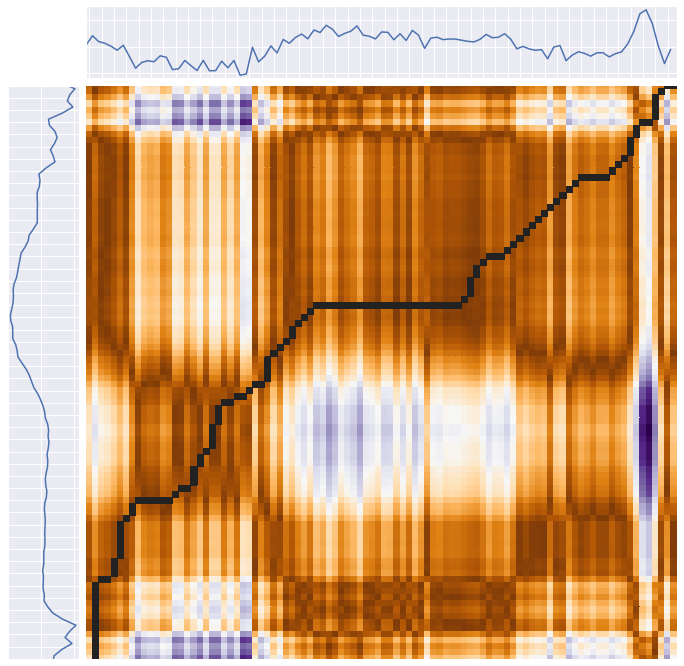

In [8]:
plot_dtw_dist(x_input_1 , x_input_2, annotation=False)

# Plot neigbours

In [158]:
X = check_data_sktime_tsc(X_test)
check_array.__code__ = _check_array_ts.__code__
X = check_array(X)

In [163]:
j= 10
p_gamma = 1/9
nei = 25
y_voisins = np.flip(y_train[ordered[j]])

clf_bknn = BayesianNeighborsTimeSeriesClassifier(metric='dtw', p_gamma = 1/8, n_neighbors_bayes=77)
clf_bknn.fit(X_train, y_train)

l_proba = [(1-p_gamma)**i*p_gamma for i in range(nei)]
ordered = clf_bknn.kneighbors(X, n_neighbors=nei, return_distance=False)

classes, y_pos = np.unique(y_voisins, return_inverse=True )

q_posteriori = get_bayesian_k_posteriori(classes, y_pos, p_gamma= p_gamma)

k_bayes = int(np.sum(np.array(range(len(q_posteriori)))*q_posteriori))

C:\Users\delan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function effective_n_jobs is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)


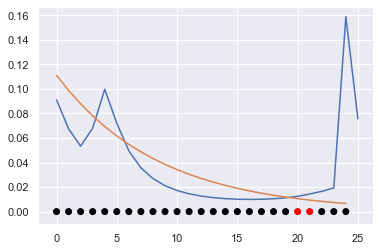

In [164]:
plt.plot(q_posteriori)
plt.plot(l_proba)
plt.scatter(range(len(y_voisins)), [0]*len(y_voisins), c= [['red', 'black'][int(i)] for i in (y_voisins.astype(int) + 1)/2], label=True )